In [80]:
import pandas as pd

In [81]:
data = pd.read_csv("archive/laptop_price.csv", encoding='latin1')
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        return X.drop(['laptop_ID', 'Product'], axis=1)

In [83]:
class CompanyEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = pd.get_dummies(X['Company'], prefix='Company', drop_first=True).columns
        return self
    
    def transform(self, X):
        X = X.copy()
        dummies = pd.get_dummies(X['Company'], prefix='Company', drop_first=True)
        for col in self.categories_:
            if col not in dummies.columns:
                dummies[col] = 0
        X = X.drop(['Company'], axis=1)
        X = X.join(dummies[self.categories_])
        return X

In [84]:
class TypeEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = pd.get_dummies(X['TypeName'], prefix='Type', drop_first=True).columns
        return self
    
    def transform(self, X):
        X = X.copy()
        dummies = pd.get_dummies(X['TypeName'], prefix='Type', drop_first=True)
        for col in self.categories_:
            if col not in dummies.columns:
                dummies[col] = 0
        X = X.drop(['TypeName'], axis=1)
        X = X.join(dummies[self.categories_])
        return X

In [85]:
class Screen(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['ScreenResolution'] = X.ScreenResolution.str.split(" ").str[-1]
        X['ScreenWidth'] = X.ScreenResolution.str.split("x").str[0].astype(int)
        X['ScreenHeight'] = X.ScreenResolution.str.split("x").str[1].astype(int)
        X = X.drop(['ScreenResolution'], axis=1)
        return X

In [86]:
class CpuEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = pd.get_dummies(X.Cpu.str.split(" ").str[0], prefix='Cpu', drop_first=True).columns
        return self
    
    def transform(self, X):
        X = X.copy()
        X['CpuName'] = X.Cpu.str.split(" ").str[0]
        X['Frequency'] = X.Cpu.str.split(" ").str[-1]
        X['Frequency'] = X['Frequency'].str[:-3].astype(float)
        dummies = pd.get_dummies(X['CpuName'], prefix='Cpu', drop_first=True)
        for col in self.categories_:
            if col not in dummies.columns:
                dummies[col] = 0
        X = X.join(dummies[self.categories_])
        X = X.drop(['Cpu', 'CpuName'], axis=1)
        return X

In [87]:
class Ram(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Ram'] = X['Ram'].str[:-2].astype(int)
        return X

In [88]:
class StorageEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Storage'] = X['Memory'].str.split(" ").str[0]
        
        def convert(value):
            number = float(value[:-2])
            if "TB" in value:
                return number * 1024
            else:
                return number
        
        X['Storage'] = X['Storage'].apply(convert)
         
        X['StorageType'] = X['Memory'].str.split(" ").str[1]
        X = X.drop(['Memory'], axis=1)
        return X

In [89]:
class StorageTypeEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.join(pd.get_dummies(X['StorageType'], prefix='StorageType', drop_first=True))
        X = X.drop(['StorageType'], axis=1)
        return X

In [90]:
class WeightEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Weight'] = X['Weight'].str[:-2].astype(float)
        return X

In [91]:
class GpuEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = pd.get_dummies(X['Gpu'].str.split(" ").str[0], prefix='Gpu', drop_first=True).columns
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Gpu'] = X['Gpu'].str.split(" ").str[0]
        dummies = pd.get_dummies(X['Gpu'], prefix='Gpu', drop_first=True)
        for col in self.categories_:
            if col not in dummies.columns:
                dummies[col] = 0
        X = X.drop(['Gpu'], axis=1)
        X = X.join(dummies[self.categories_])
        return X

In [92]:
class OpEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.categories_ = pd.get_dummies(X['OpSys'], prefix='OpSys', drop_first=True).columns
        return self
    
    def transform(self, X):
        X = X.copy()
        dummies = pd.get_dummies(X['OpSys'], prefix='OpSys', drop_first=True)
        for col in self.categories_:
            if col not in dummies.columns:
                dummies[col] = 0
        X = X.drop(['OpSys'], axis=1)
        X = X.join(dummies[self.categories_])
        return X

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('drop_features', DropFeatures()),
    ('company_encode', CompanyEncode()),
    ('type_encode', TypeEncode()),
    ('screen_encode', Screen()),
    ('cpu_encode', CpuEncode()),
    ('ram_encode', Ram()),
    ('storage_encode', StorageEncode()),
    ('storage_type_encode', StorageTypeEncode()),
    ('weight_encode', WeightEncode()),
    ('gpu_encode', GpuEncode()),
    ('op_encode', OpEncode()),
    ('random_forest', RandomForestRegressor())
])

In [94]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price_euros'], axis=1)
y = data['Price_euros']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('drop_features', ...), ('company_encode', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum numbe

In [97]:
pipeline.score(X_test, y_test)

0.8285731619236703

In [98]:
y_pred = pipeline.predict(X_test)
y_pred

array([1434.8671    , 1543.7036    ,  579.6311    ,  919.5642    ,
       1528.9773    , 1538.398     ,  858.11      ,  521.04033333,
       1524.60738   ,  579.88679167, 2354.18966667,  953.816     ,
       1885.358     ,  746.477     , 1840.4075    , 1096.9839    ,
       1362.8693    ,  952.5932    ,  654.28143333, 1965.916     ,
       2689.7731    ,  709.3489    , 1099.8142    ,  412.07996833,
        890.2955    , 1083.4875    ,  706.2185    ,  555.9562    ,
       1516.5891    , 1058.10145   ,  462.79523333, 1726.5127    ,
       1588.2894    , 1190.35831   , 1201.243     ,  710.5158    ,
        694.774     ,  464.9758    , 1206.71527571,  244.0028    ,
       1868.772     ,  621.50846667,  830.0743    , 2707.8498    ,
        577.4366    , 1559.12185   , 1940.31601333,  239.184     ,
        922.5602    , 1561.5894    , 1786.1326    ,  620.1083    ,
        756.8449    , 1181.7499    ,  570.68439833, 1196.97103333,
        239.184     ,  927.2374    , 1291.029     ,  919.5642 

<Axes: xlabel='Price_euros', ylabel='OpSys'>

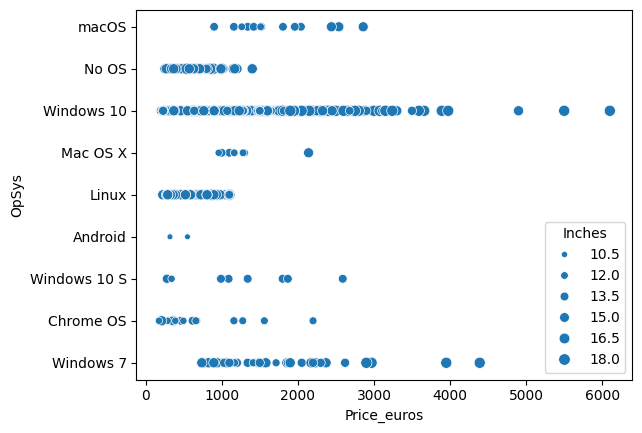

In [104]:
import seaborn as sns

sns.scatterplot(data, x='Price_euros', y='OpSys', size='Inches')